In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models.ldamodel import LdaModel as ldamodel
from gensim import corpora, models
import pandas as pd
import gensim
import pprint
from gensim.test.utils import datapath
import pyLDAvis
import pyLDAvis.gensim
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
stop_words = stopwords.words('english')
stop_words.extend(['content', 'context', 'number', 'file', 'yet', 'user', 'year', 'name', 'column', 'row',
                   'dataset', 'data', 'database', 'from', 'subject', 're',
                   'edu', 'use', 'not', 'would', 'say',
                   'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done',
                   'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather',
                   'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need',
                   'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


pattern = r'\b[^\d\W]+\b'
tokenizer = RegexpTokenizer(pattern)
lemmatizer = WordNetLemmatizer()

In [3]:
# Input from csv
df = pd.read_csv('voted-kaggle-dataset.csv')

# sample data
#print(df['Description'].head())

# list for tokenized documents in loop
texts = []

# loop through document list
for i in df['Description'].iteritems():
    # clean and tokenize document string
    raw = str(i[1]).lower()
    tokens = tokenizer.tokenize(raw)

    # remove stop words from tokens
    stopped_tokens = [raw for raw in tokens if raw not in stop_words]

    # lemmatize tokens
    lemma_tokens = [lemmatizer.lemmatize(toks) for toks in stopped_tokens]

    # remove word containing only single char
    new_lemma_tokens = [raw for raw in lemma_tokens if len(raw) > 1]

    # add tokens to list
    texts.append(new_lemma_tokens)

In [21]:
texts_small = texts[:100]

In [22]:
# turn our tokenized documents into a id <-> term dictionary
dictionary_small = corpora.Dictionary(texts_small)
# convert tokenized documents into a document-term matrix
corpus_small = [dictionary_small.doc2bow(text) for text in texts_small]

lda_model_small = ldamodel(corpus_small, num_topics=10, id2word = dictionary_small)

temp_file_small = datapath("model_small")
lda_model_small.save(temp_file_small)

In [8]:
temp_file = datapath("model")
lda_model.save(temp_file)

In [ ]:
# Load a potentially pretrained model from disk.
# lda_model = ldamodel.load(temp_file)

In [23]:
pprint.pprint(lda_model_small.top_topics(corpus,topn=5))

[([(0.006612382, 'match'),
   (0.004423616, 'information'),
   (0.0038142335, 'csv'),
   (0.0037988967, 'time'),
   (0.0032829007, 'one')],
  -0.9637232661454455),
 ([(0.011626127, 'numeric'),
   (0.008503045, 'integer'),
   (0.007981445, 'strongly'),
   (0.006734573, 'csv'),
   (0.0058219084, 'time')],
  -1.6384519975422573),
 ([(0.011969862, 'csv'),
   (0.005863008, 'video'),
   (0.0050498843, 'time'),
   (0.004209252, 'file'),
   (0.004181255, 'high')],
  -1.7713046663817387),
 ([(0.008613354, 'csv'),
   (0.0064050094, 'price'),
   (0.004818208, 'contains'),
   (0.004287029, 'bitcoin'),
   (0.0037729985, 'time')],
  -2.047219820648297),
 ([(0.0062840586, 'time'),
   (0.0059982473, 'csv'),
   (0.005322757, 'video'),
   (0.0047865096, 'type'),
   (0.004442984, 'pokemon')],
  -2.9413243446314947),
 ([(0.031029481, 'integer'),
   (0.027052922, 'strongly'),
   (0.015127073, 'enjoy'),
   (0.014598461, 'agree'),
   (0.013988477, 'disagree')],
  -3.094872091537837),
 ([(0.006019302, 'csv'),

IndexError: list index out of range

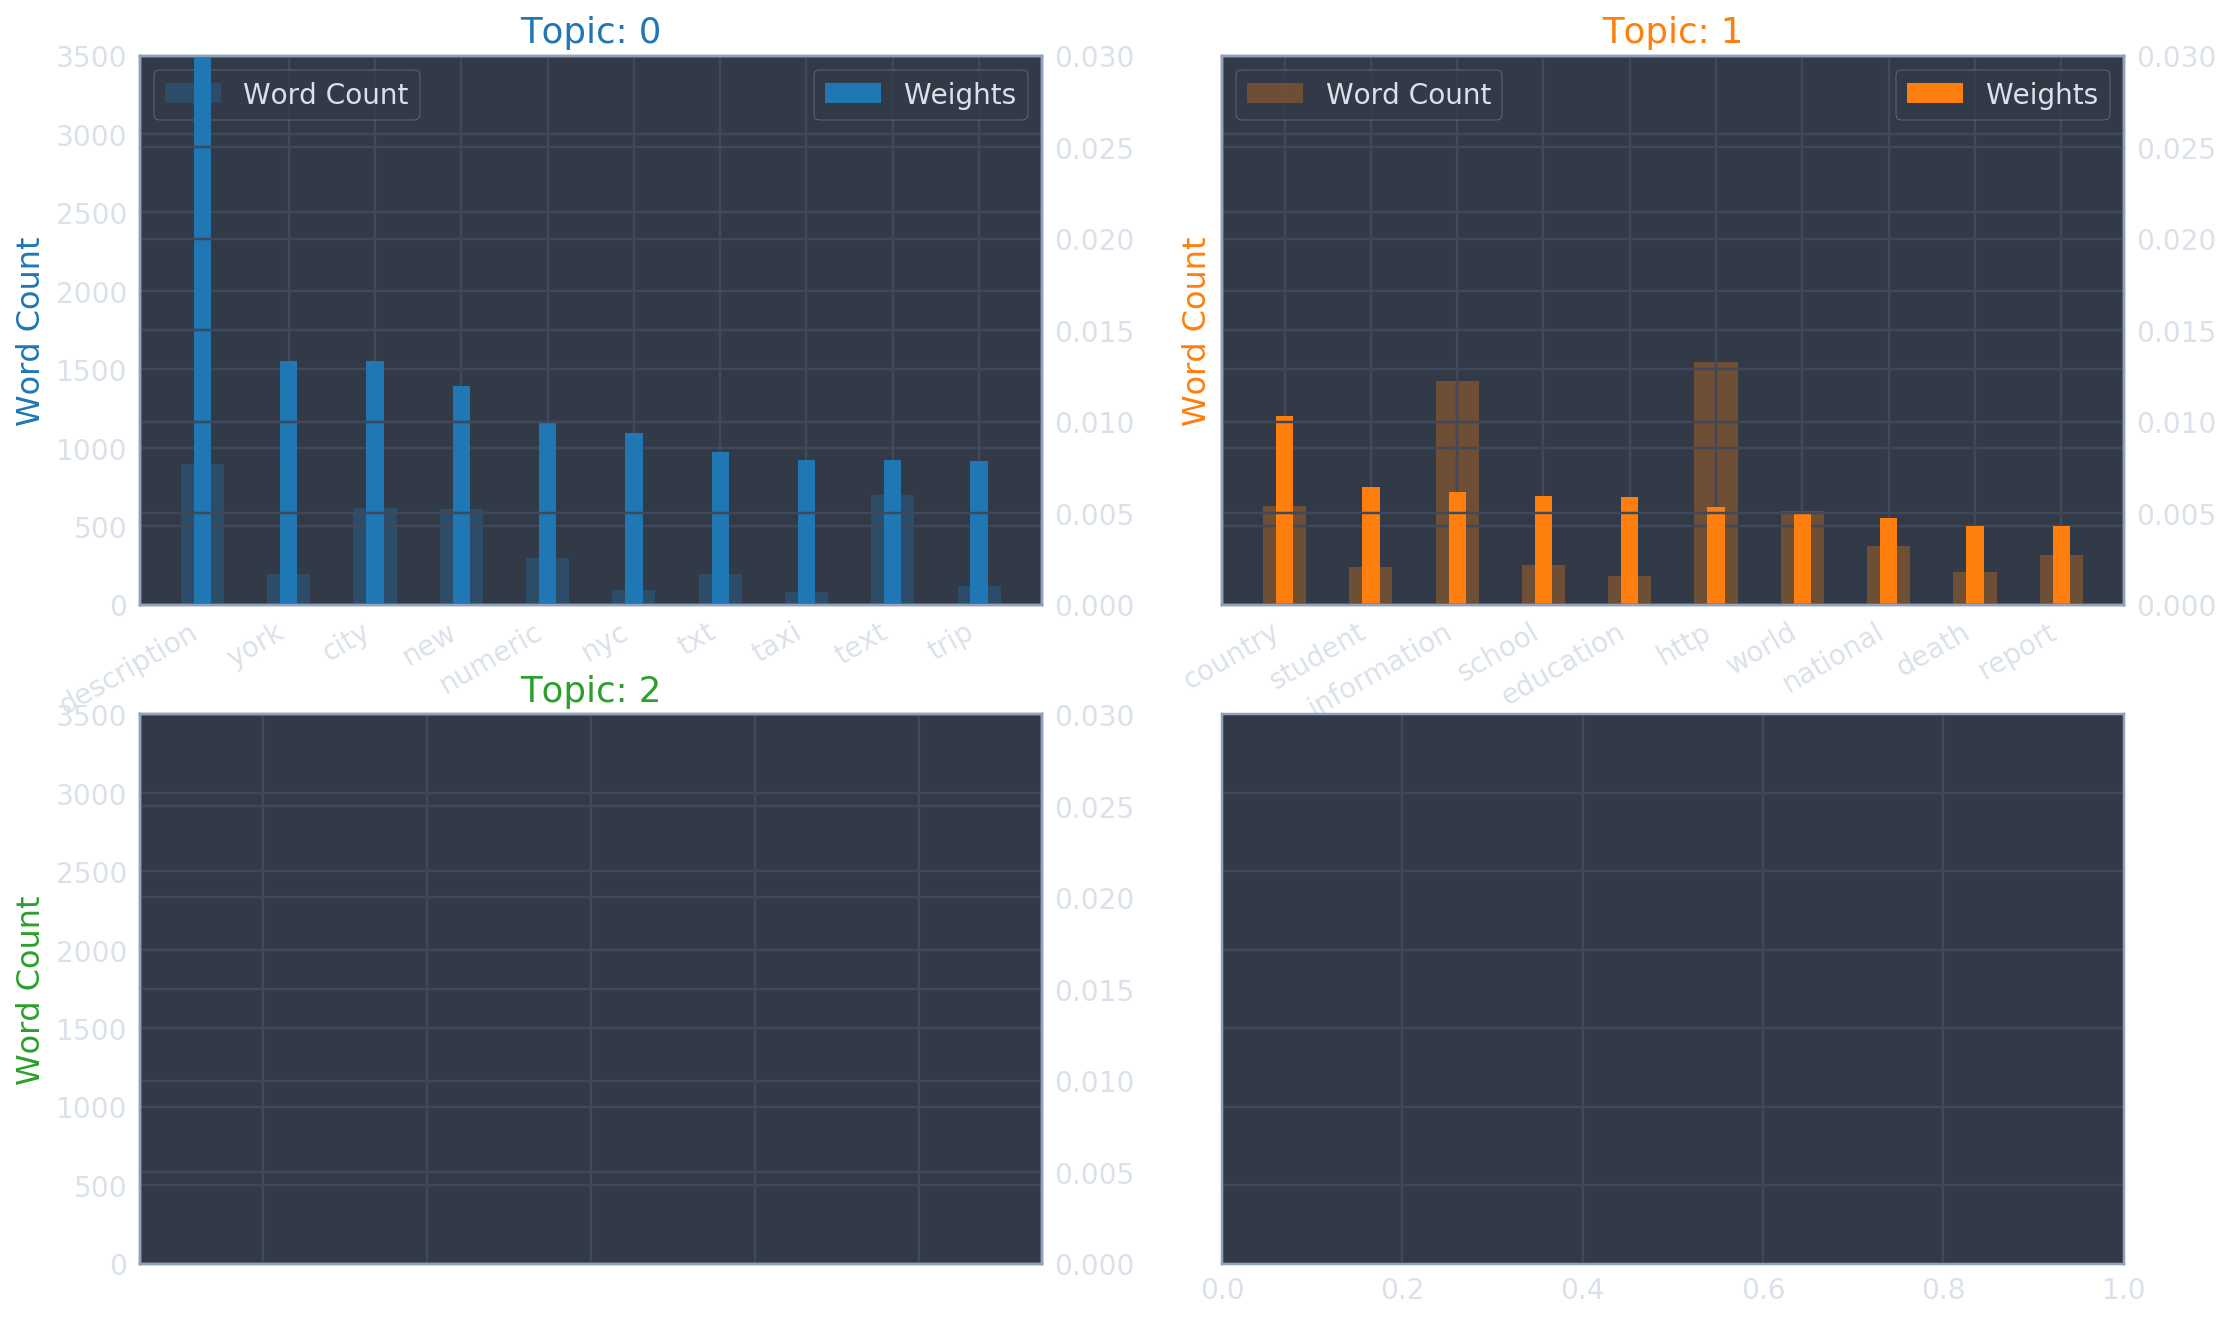

In [19]:
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in texts for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [24]:
prepared = pyLDAvis.gensim.prepare(lda_model_small, corpus_small, dictionary_small)
pyLDAvis.display(prepared)
# pyLDAvis.show(prepared)

/Users/alyona/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


In [25]:
pyLDAvis.prepared_data_to_html(prepared, 'vis_topic_model_01.html')

'\n<link rel="stylesheet" type="text/css" href="https://cdn.rawgit.com/bmabey/pyLDAvis/files/ldavis.v1.0.0.css">\n\n\n<div id="ldavis_el2396846401906566348704161"></div>\n<script type="text/javascript">\n\nvar ldavis_el2396846401906566348704161_data = {"mdsDat": {"x": [-0.03218976274203823, 0.03121251760373192, -0.03807152278282003, 0.10598729822117209, -0.005617822715735112, -0.007437417780939124, -0.004858025916125809, -0.025507517500563768, -0.027210905161296584, 0.003693158774614637], "y": [0.013553951701997915, -0.015768576962644863, 0.008087508371410625, 0.015999071012224333, 0.04065741929625724, -0.0027506666991886555, -0.07958477804016162, 0.024204824913445694, 0.00014060880019973999, -0.004539362393540224], "topics": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], "cluster": [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], "Freq": [15.922181129455566, 14.970338821411133, 14.55044174194336, 11.746810913085938, 11.584546089172363, 10.10262393951416, 8.925610542297363, 7.639001846313477, 2.7741496562957764, 1.7

In [ ]:
pyLDAvis.save_html(prepared, 'vis_topic_model_01.html')

In [ ]:
pyLDAvis.show(prepared)


Note: if you're in the IPython notebook, pyLDAvis.show() is not the best command
      to use. Consider using pyLDAvis.display(), or pyLDAvis.enable_notebook().
      See more information at http://pyLDAvis.github.io/quickstart.html .

You must interrupt the kernel to end this command

Serving to http://127.0.0.1:8889/    [Ctrl-C to exit]


127.0.0.1 - - [14/May/2019 08:10:05] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2019 08:10:05] "GET /LDAvis.css HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2019 08:10:05] "GET /d3.js HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2019 08:10:05] "GET /LDAvis.js HTTP/1.1" 200 -
127.0.0.1 - - [14/May/2019 08:10:05] code 404, message Not Found
127.0.0.1 - - [14/May/2019 08:10:05] "GET /favicon.ico HTTP/1.1" 404 -


In [10]:
# Sentence Coloring of N Sentences


def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()    

NameError: name 'plt' is not defined